# Ocean wave mode (One dimensional case)

## Wave parameters

We have:

* significant wave $H_s = 4\sqrt{\sigma_\xi^2}$, where $\sigma_\xi^2$ - dispersion
* ocean spectrum $s(\omega) = \frac{1.25}{4} \frac{\omega_m^4}{\omega^5} exp \left( -1.25 \frac{\omega_m^4}{\omega^4} \right)$





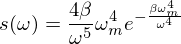

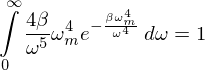

In [35]:
# spectrum normalization proof
%reset -f
from sympy import *
init_printing()

omega, omega_m, beta = symbols("omega omega_m beta", positive=True)
s_fun = Function('s')(omega)

s_expr = (4 * beta * omega_m**4) / (
    omega**5) * exp(-beta * omega_m**4 / omega**4)
display(Eq(s_fun, s_expr))

s_expr_int = Integral(s_expr, (omega, 0, oo))
s_int = s_expr_int.doit()
display(Eq(s_expr_int, s_int))

* relation between wave number and frequncy: $k(\omega) = \frac{\omega^2}{g}$; $\omega(k) = \sqrt{k g}$

* wave length: $\lambda = \frac{2 \pi}{k}$

* wave height: $h$

**IMPORTANT NOTE**: $\lambda \gg h$ !!!

## Single wave

wave height:

$y(t, x) = a \cdot cos(k x + \omega t + \phi_0)$

object on wave surface:

$x_{obj} = x + a \cdot sin(k x + \omega t + \phi_0)$

$y_{obj} = a \cdot cos(k x + \omega t + \phi_0)$




Populating the interactive namespace from numpy and matplotlib


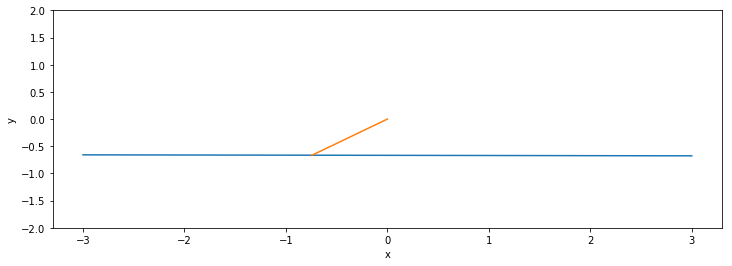

In [1]:
# single wave demo
%reset -f
%pylab inline
from matplotlib import animation
from IPython.display import HTML

a = 1
omega = 0.2
k = omega ** 2 / 9.8
phi_0 = 0

x = np.linspace(-3, 3, 20)
t = np.linspace(0, 200, 1000)[:, np.newaxis]

wave_h = a * cos(k * x + omega * t + phi_0)

obj_x_0 = 0
obj_y_0 = 0
obj_y = a * cos(k * obj_x_0 + omega * t + phi_0)[:, 0]
obj_y += obj_y_0
obj_x = - a * sin(k * obj_x_0 + omega * t + phi_0)[:, 0]
obj_x += obj_x_0

#display(obj_x)

fig = plt.figure(figsize=(12, 4))
wave_line, = plt.plot(x, wave_h[0])
obj_line, = plt.plot([0, obj_x[0]], [0, obj_y[0]])
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2, 2])

def update_plot(i):
    wave_line.set_ydata(wave_h[i])
    obj_line.set_data([0, obj_x[i]], [0, obj_y[i]])
    return wave_line, obj_line

anim = animation.FuncAnimation(fig, func=update_plot, frames=len(t), interval=50, blit=True)
HTML(anim.to_html5_video())

## Surface point trajectory


# Main references
1. Techet A.H. Design Principles for Ocean Vehicles // MIT OpenCourseWare, 2005.
2. Salmon R. Introduction to Ocean Waves // Scripps Institution of Oceanography University of California, San Diego, 2016.
3. Hauser D., Kahma, Krogstad H. E., Lehner S., Monbaliu J., Wyatt L. R. Measuring and analysing the directional spectrum of ocean waves // Office for Official Publications of the European Communities, 2005. 
